# 1. O problema

O diretor de um banco está descontente com o fluxo de clientes abandonando os serviços do banco, notadamente o de cartão de crédito. Ele ficaria feliz se alguém conseguisse prever os próximos que abandonarão os serviços para que o banco possa agir proativamente, oferecedendo serviços melhores e modificando a decisão dos clientes.

## 1.1 O exercício

O exercício consiste em 

(i) elaborar uma breve análise exploratória de dados com o objetivo de identificar o comportamento das variáveis e analisar que atributos se conectam com a ação de cancelamento dos cartões de crédito dos clientes. Em seguida, será realizado um 

(ii) pré-processamento dos dados, mas não a modelagem, pois está será abordada mais à frente no programa de estudos.

## 1.2 O Data Set

O dataset contém pouco mais de 10000 linhas, sendo cada uma um cliente, com os seguintes atributos:

- "CLIENTNUM": código de identificação do cliente;
- "Attrition_Flag": indica se houve cancelamento ou se a pessoa ainda é cliente;
- "Customer_Age": idade do cliente ou ex-cliente;
- "Gender": gênero;
- "Dependent_count": quantidade de dependentes;
- "Education_Level": nível de escolaridade;
- "Marital_Status": estado civil;
- "Income_Category": renda anual categorizada;
- "Card_Category": qual cartão o cliente possui (blue, silver, outros )
- "Months_on_book": tempo como cliente em meses;
- "Total_Relationship_Count": quantos produtos o cliente contratou com o banco;
- "Months_Inactive_12_mon": meses em que o cliente esteve inativo no último ano;
- "Contacts_Count_12_mon": número de contatos nos últimos 12 meses";
- "Credit_Limit": limite de crédito total;
- "Total_Revolving_Bal": limite de crédito consumido;
- "Total_Amt_Chng_Q4_Q1": mudança de quantidade de valores transacionais  entre o quarto trimestre de um ano e o primeiro de outro.
- "Avg_Open_To_Buy": limite de crédito disponível;
- "Total_Trans_Amt": valor total utilizado em transferências;
- "Total_Trans_Ct": quantidade total de transferências;
- "Total_Ct_Chng_Q4_Q1": mudança de quantidade de transações entre o quarto trimestre de um ano e o primeiro de outro.
- "Avg_Utilization_Ratio": taxa de utilização do cartão.


## 1.3. Abordagem

Se trata de um problema de _churn_, em que o _business_ deseja saber em quais clientes devem dedicar seus esforços de maneira a mudar suas possíveis futuras decisões de abandonar os serviços do banco.

Nesse sentido, após uma olhada inicial e uma limpeza geral no dataset, buscaremos inferir quais as principais variáveis parecem indicar a virada de chave para um cliente se tornar ex-cliente.

Para isso, separeremos o dataset em dois: um de clientes existentes e outro de ex-clientes. Apesar do desequilíbrio entre a quantidade de dados de clientes versus a quantidade de dados de ex-clientes, como se verá, acredita-se que isolando os dados dos ex-clientes poderemos averiguar quais os principais atributos prevalecem nessa categoria _que não prevalecem nos atuais clientes_.

Espera-se que, dessa maneira, a análise possa produzir insights para eventuais ações que o diretor deseja tomar em relação aos atuais clientes que possam vir a declinar os serviços do banco.

# 2. Lendo os dados

In [38]:
import os #pacote para interação com o sistema operacional
import pandas as pd #biblioteca pandas para interação e manipulação de dataframes

In [39]:
#Verificando os arquivos presentes no diretório
os.listdir()

['.git', 'notebook_final.ipynb', 'raw_data', 'README.md']

In [40]:
#Tudo mais constante, facilitando a leitura do dataset pelo pandas
raw_dataset_folder = os.listdir("raw_data")
dataset = raw_dataset_folder[0]
dataset

'bank_churn.csv'

Terminando o carregamento dos dados em uma variável, podemos utilizar a biblioteca `pandas` para transformar esses dados em um formato `DataFrame` facilmente lido pelo python. Para uma intuição inicial, vamos visualizar o dataset no formato tabular.

In [41]:
df_raw = pd.read_csv(f"raw_data/{dataset}")
df_raw.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Na primeira visão do dataset, vemos que a coluna Clientnum é virtualmente inútil para nosso exercício, pois ela apresenta um valor conhecido como chave primária de usuário. Isso significa que cada usuário possui uma e apenas uma chave referente ao seu cadastro, e elas não se repetem. Não apresentando padrão específico e não nos interessando a identificação dos clientes, podemos excluí-la sem correr risco de perda de informação relevante. Em seguida, verificaremos os tipos de dados em cada coluna e se há elementos faltantes que exijam algum tipo de limpeza.

In [42]:
# Excluindo a coluna clientnum

df = df_raw.drop(columns=["CLIENTNUM"]).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Algumas colunas são numéricas, e outras são objetos. Vendo acima a exibição do dataframe, são as colunas que apresentam dados categorizados, como o nível salarial.

In [43]:
# Não há dados nulos

df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Dada a inexistência de nulos, verificamos a existência de duplicatas. Como explicamos anteriormente, cada cliente tem apenas um conjunto de valores associados a ele. Portanto, linhas duplicadas não acrescentam informação relevante.

In [44]:
df.duplicated().any()


False

Garantindo os dois passos anteriores, podemos seguir com a estratégia de análise dos dados apresentados.

# 3. Análise Exploratória de Dados

Apesar de existirem diversas formas de tentar entender o motivo do _churn_ pelos clientes por meio do processo de modelagem com _machine learning_, o processo de análise exploratória nos permite criar intuições que podem se confirmar ou não no processo de modelagem. Esse processo é extremamente útil para a construção de hipóteses validadas posteriormente. Em muitos casos, uma simples heurística pode se mostrar eficiente e bem menos custosa do que desenvolver um modelo de aprendizado de máquina.

Inicialmente, visualizaremos as principais estatísticas descritivas do dataframe, utilizando o método `describe`, que também nos ajudará a ter uma intuição de quais variáveis são numéricas.

In [45]:
df.describe().T.style.bar(
    subset=['mean'],
    color='lightsalmon').background_gradient(
    subset=['std'], cmap='plasma').background_gradient(
    subset=['75%'], cmap='plasma').background_gradient(
    subset=['max'], cmap='plasma')

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.000000,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.000000
Dependent_count,10127.000000,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.000000
Months_on_book,10127.000000,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.000000
Total_Relationship_Count,10127.000000,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,10127.000000,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.000000
Contacts_Count_12_mon,10127.000000,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.000000
Credit_Limit,10127.000000,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.000000
Total_Revolving_Bal,10127.000000,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.000000
Avg_Open_To_Buy,10127.000000,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.000000
Total_Amt_Chng_Q4_Q1,10127.000000,0.759941,0.219207,0.000000,0.631000,0.736000,0.859000,3.397000


Podemos ver que não são todas as colunas que apresentam valores numéricos não-categóricos. Essas colunas podem ser facilmente visualizadas através de um histograma de frequências. Nos atentaremos também ao fato de que algumas variáveis numéricas podem representar valores discretos e talvez sejam melhor visualizadas em um gráfico de pizza ou de barras.

Para nosso desenvolvimento, separaremos os conjuntos pela variável-objetivo, `Attrition_Flag`, e desenvolveremos diversas visualizações para tentar entender de maneira qualitativa quais atributos podem indicar quando um cliente está para se tornar ex-cliente.

In [46]:
# Separando os dataframes

existing = df[df["Attrition_Flag"] == "Existing Customer"].copy()
attrited = df[df["Attrition_Flag"] == "Attrited Customer"].copy()

## 3.1 Avaliação por histogramas. 

Abaixo, utilizaremos um laço de repetição para gerar visualizações por força bruta. Nosso intuito é o de facilitar a visualização das medianas e a distribuição das variáveis pelos atributos, que são numerosos, evitando tarefa repetitiva sem necessidade. Algumas visualizações falharão em razão da natureza categórica do atributo, que geralmente armazera objetos não-numéricos como dados. Estes casos, assim como os cuja visualização não ficarem adequadas por meio do histograma, serão comentados mais adiante. A mediana será utilizada como estatística descritiva padrão para impedir que outliers impactem a análise.

In [47]:
# importando o matplotlib

import matplotlib.pyplot as plt

Analisando coluna: Customer_Age
mediana dos clientes: 46.0
mediana dos ex-clientes: 47.0


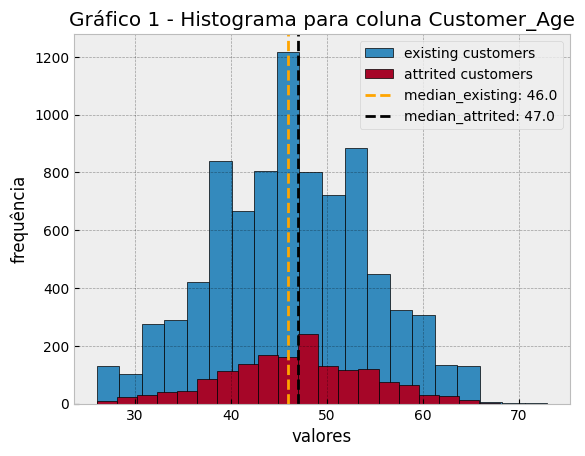

Analisando coluna: Dependent_count
mediana dos clientes: 2.0
mediana dos ex-clientes: 2.0


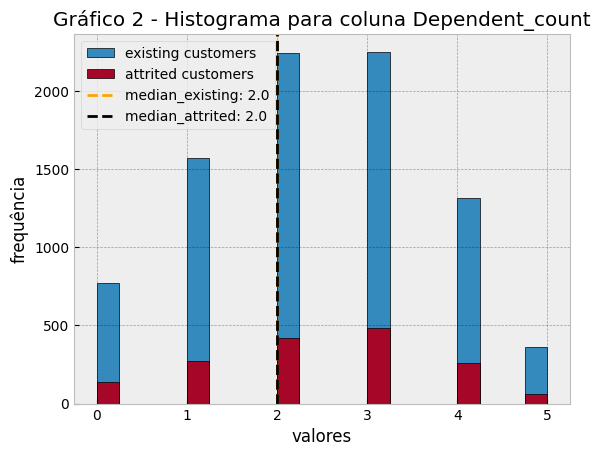

Analisando coluna: Months_on_book
mediana dos clientes: 36.0
mediana dos ex-clientes: 36.0


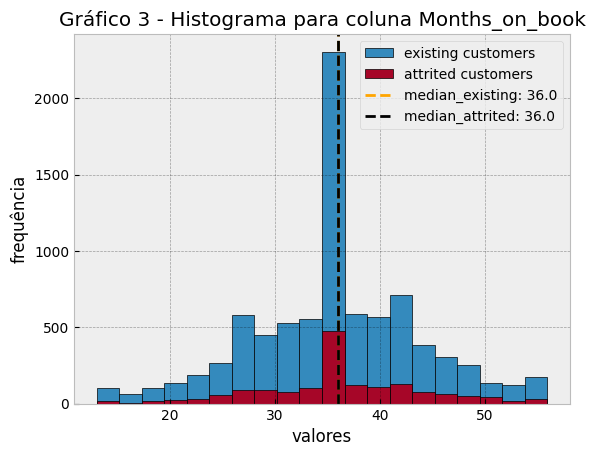

Analisando coluna: Total_Relationship_Count
mediana dos clientes: 4.0
mediana dos ex-clientes: 3.0


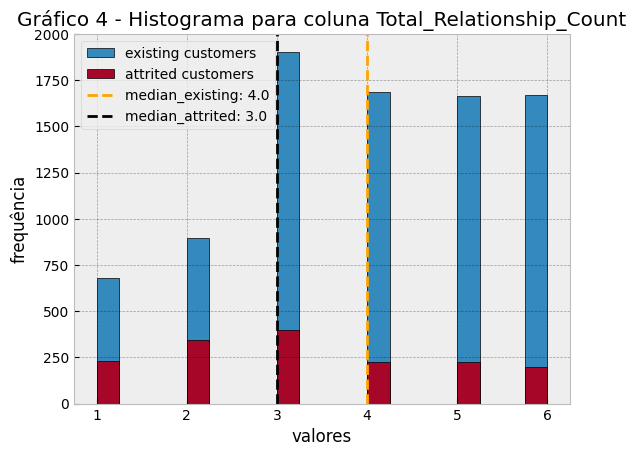

Analisando coluna: Months_Inactive_12_mon
mediana dos clientes: 2.0
mediana dos ex-clientes: 3.0


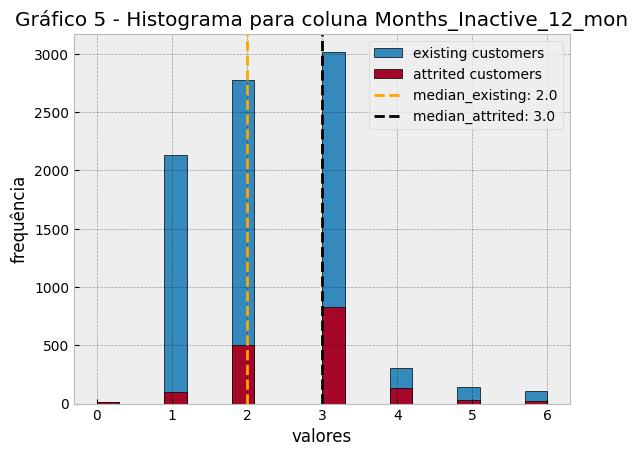

Analisando coluna: Contacts_Count_12_mon
mediana dos clientes: 2.0
mediana dos ex-clientes: 3.0


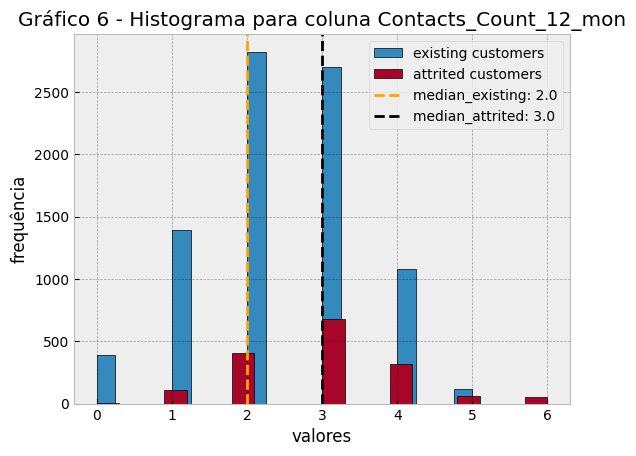

Analisando coluna: Credit_Limit
mediana dos clientes: 4643.5
mediana dos ex-clientes: 4178.0


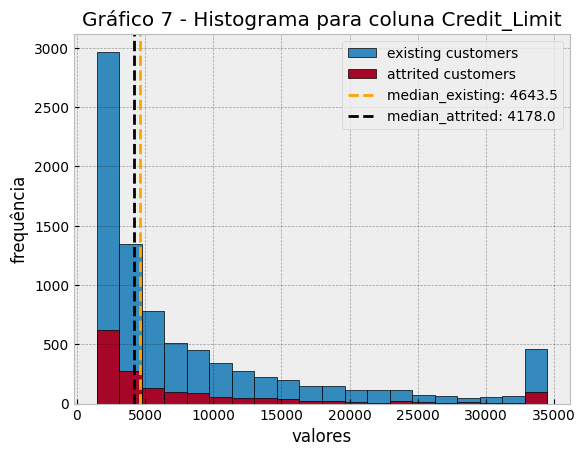

Analisando coluna: Total_Revolving_Bal
mediana dos clientes: 1364.0
mediana dos ex-clientes: 0.0


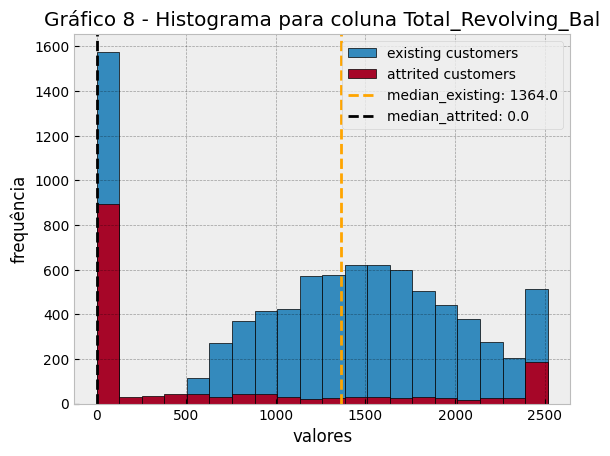

Analisando coluna: Avg_Open_To_Buy
mediana dos clientes: 3469.5
mediana dos ex-clientes: 3488.0


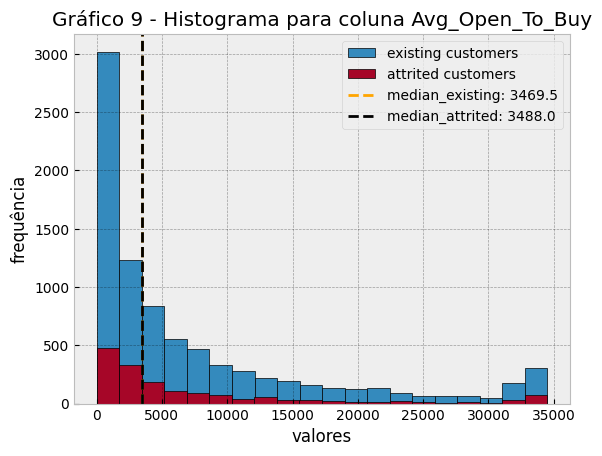

Analisando coluna: Total_Amt_Chng_Q4_Q1
mediana dos clientes: 0.743
mediana dos ex-clientes: 0.701


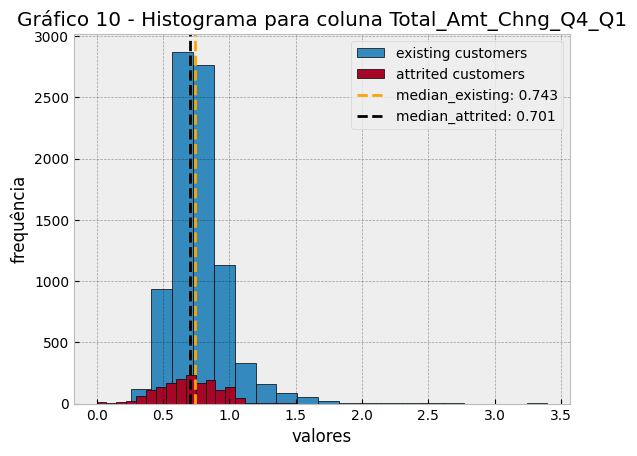

Analisando coluna: Total_Trans_Amt
mediana dos clientes: 4100.0
mediana dos ex-clientes: 2329.0


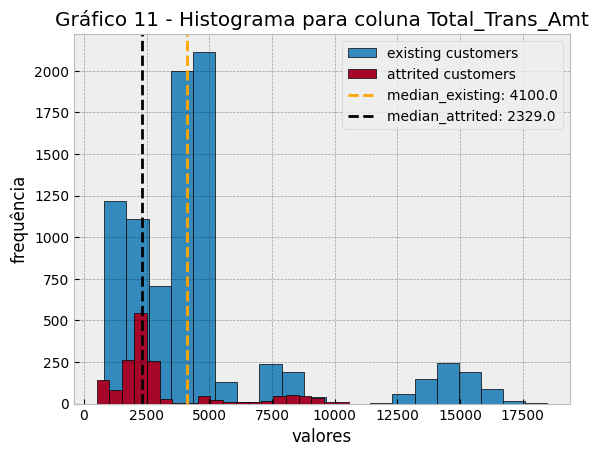

Analisando coluna: Total_Trans_Ct
mediana dos clientes: 71.0
mediana dos ex-clientes: 43.0


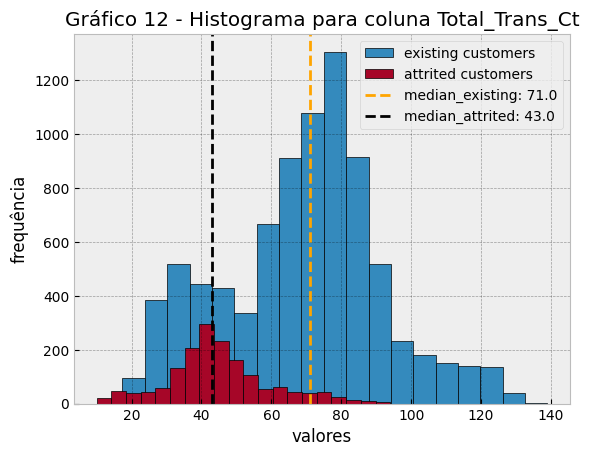

Analisando coluna: Total_Ct_Chng_Q4_Q1
mediana dos clientes: 0.721
mediana dos ex-clientes: 0.531


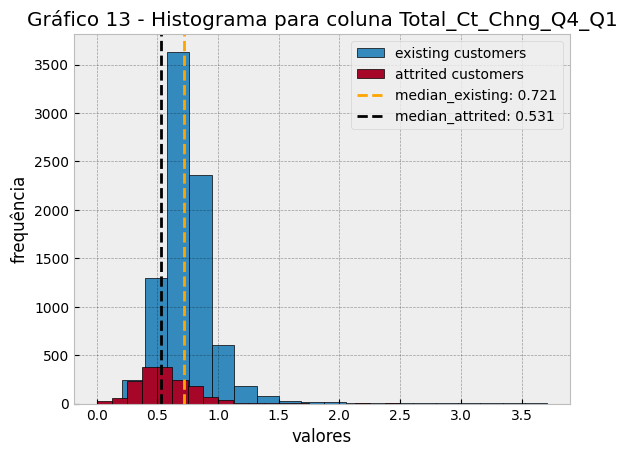

Analisando coluna: Avg_Utilization_Ratio
mediana dos clientes: 0.211
mediana dos ex-clientes: 0.0


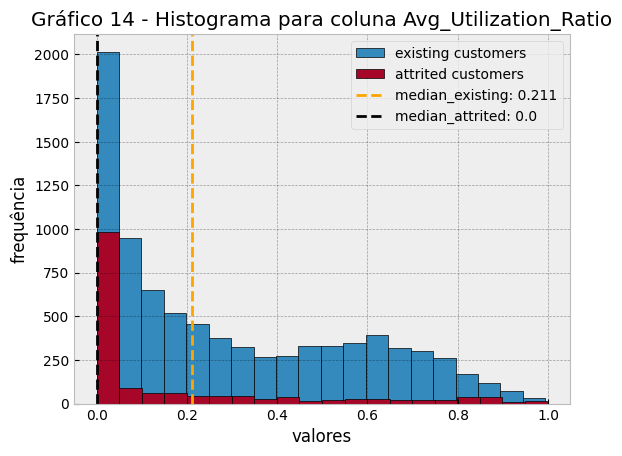

In [48]:
# Vamos fazer uma tentativa de visualização por força bruta
# Portanto, vamos criar duas listas com o objetivo de separar
# as colunas que conseguiram ser plotadas por histograma e as
# que falharam. Para isso, utilizaremos um laço de exceção
# que será responsável por separar as colunas em suas respectivas
# listas

list_good_columns = []
list_bad_columns = []
i = 1

# Iterando por todas as colunas 
for column in df.columns:
    try:
        median_existing = existing[column].describe().T[5]
        median_attrited = attrited[column].describe().T[5]
        print(f"Analisando coluna: {column}")
        print(f"mediana dos clientes: {median_existing}")
        print(f"mediana dos ex-clientes: {median_attrited}")
        list_good_columns.append(column)
        
        plt.style.use("bmh")
        plt.hist(existing[column], edgecolor="black", bins=20,
         label="existing customers")
        plt.hist(attrited[column], edgecolor="black", bins=20,
                label="attrited customers")
        plt.axvline(x = median_existing, color="orange",
                    label=f"median_existing: {median_existing}", ls='--')
        plt.axvline(x = median_attrited, color="black",
                    label=f"median_attrited: {median_attrited}", ls='--')
        plt.xlabel("valores")
        plt.ylabel("frequência")
        plt.title(f"Gráfico {i} - Histograma para coluna {column}")
        plt.grid(alpha=0.35, color="black")
        plt.legend()
        plt.show()
        i += 1
    except:
       # print(f"coluna {column} não possui valores numéricos")
        list_bad_columns.append(column)

Dessa maneira, poderemos ver, gráfico a gráfico, quais dos atributos numéricos há uma disparidade de ocorrências no universo de clientes e de ex-clientes.

### Eliminando atributos da análise

Seguindo a estratégia de análise já definida, podemos excluir como fatores relevantes para a virada de chave do cliente os atributos de idade `Customer_Age`, número de dependentes `Dependent_count`, tempo como cliente `Months_on_book`, Linha de crédito disponível `Avg_Open_To_Buy`, mudança da quantidade de valores transacionados entre o último e o primeiro trimestres do ano `Total_Amt_Chng_Q4_Q1`, mudança na quantidade de transações `Total_CT_Chng_Q4_Q1`.

Optamos por essa decisão pois não há mudança radical de mediana entre o universo de clientes e ex-clientes no que tange esses atributos. A proximidade das medianas parece nos indicar que não seja um fator relevante para predição da mudança de comportamento do cliente. Incentivar uma postura proativa nesses casos pode significar dispêndio de energia em clientes que não correm o risco de abandonar o banco.

### Selecionando histogramas que não ficaram bons

Como utilizamos um método de força bruta, já sabíamos que alguns não ficariam bons. As colunas `Total_Relationship_Count`, `Months_Inactive_12_mon` e `Contacts_Count_12_mon` serão armazenadas numa variável lista com o objetivo de retornarmos a elas futuramente.

In [49]:
bad_histograms = ["Dependent_count", "Total_Relationship_Count",
                  "Months_Inactive_12_mon", "Contacts_Count_12_mon"]

### Análise dos histogramas bons

Os histogramas são boas visualizações para dados numéricos e contínuos. Nesse sentido, os gráficos das colunas que representam límite de crédito `Credit_Limit`, total de quantidade transacionada nos últimos 12 meses `Total_Trans_Amt`, total de transações nos últimos 12 meses `Total_Trans_Ct` e saldo rotativo total `Total_Revolving_Bal` nos permite tirar conclusões ou, no mínimo, intuições sobre o que pode indicar/prever a mudança de comportamento do cliente.

#### Limite de Crédito

Embora a distribuição de variáveis seja similar, a disparidade de medianas pode indicar que clientes com maior limite de crédito tendem a permanecer no banco. Entretanto, não há valor preditivo a olho nu a partir dessa variável. Ela pode ser útil após um tratamento em modelo de aprendizado de máquina.

#### Saldo de Crédito Rotativo

O saldo de crédito rotativo parece ser um bom indicador para a mudança de comportamento do cliente para se tornar ex-cliente. Como mostra a mediana, há uma concentração expressiva de ex-clientes que zeraram o balanço do crédito rotativo. A ação de zerar o balanço de crédito rotativo deve ligar uma luz amarela para a gerência do banco, que deve ter estratégias desenvolvidas para agir proativamente.

#### Valor total utilizado em transferências

A distância entre as medianas mostra que ex-clientes tendem a transacionar menores quantias quando interagem com os serviços do banco.

#### Quantidade total de transações

Da mesma forma que no dado anterior, os ex-clientes tendem a realizar um menor número de transações por meio do banco e seu cartão de crédito. Dessa maneira, a gerência deve se atentar a esse dado para desenvolver estratégias proativas a contorná-lo.

### Replotando os histogramas que não ficaram bons como gráfico de pizza

Vamos replotar os histogramas que não ficaram legais, em razão da natureza _discreta_ dos dados, em gráficos de pizza.

In [50]:
# Recuperando a variável
bad_histograms

['Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

Gráfico 15 - Analisando a coluna: Dependent_count


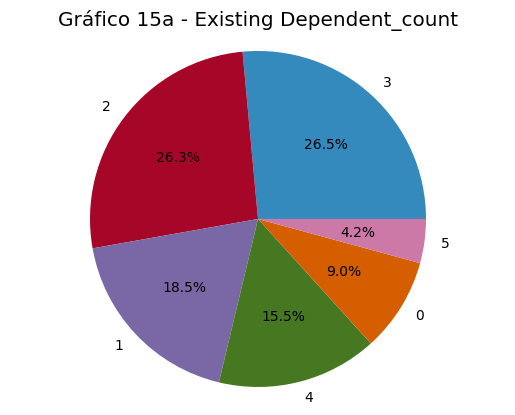

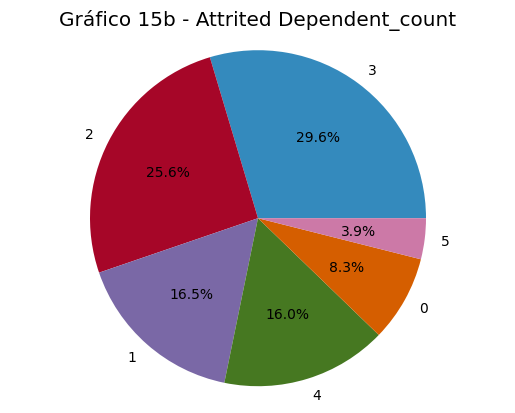

Gráfico 16 - Analisando a coluna: Total_Relationship_Count


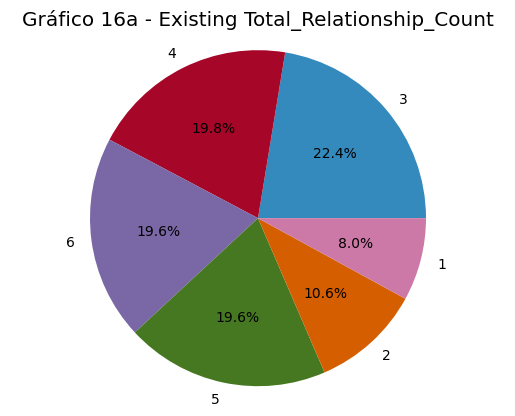

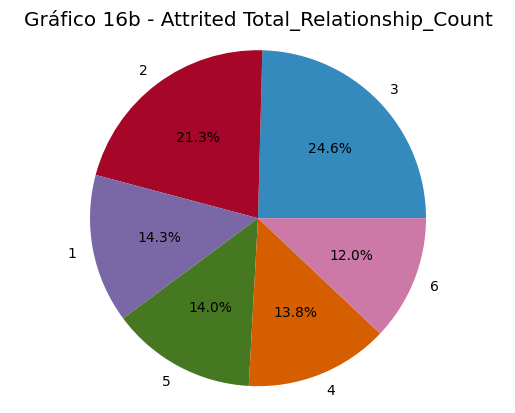

Gráfico 17 - Analisando a coluna: Months_Inactive_12_mon


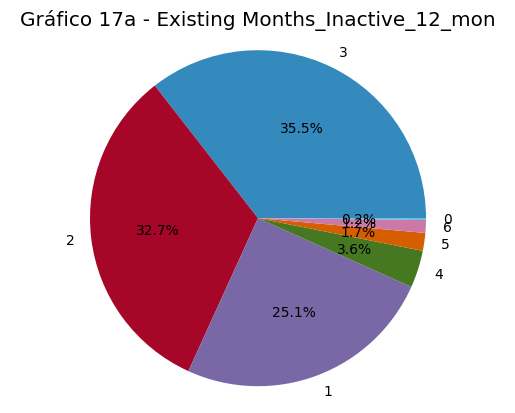

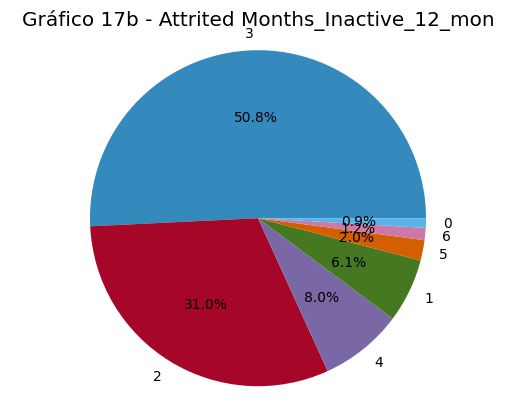

Gráfico 18 - Analisando a coluna: Contacts_Count_12_mon


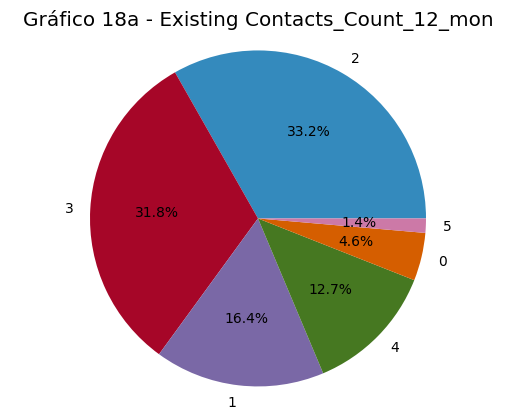

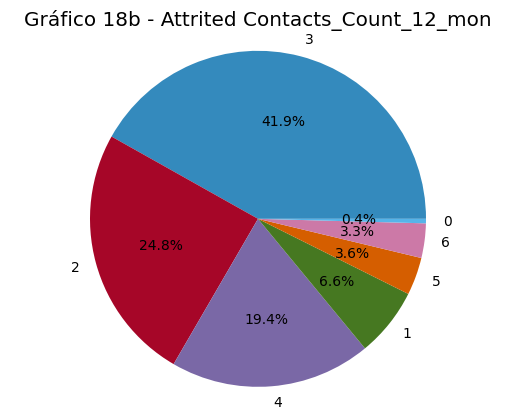

In [51]:
# Continuando a numeração de onde paramos
i = 15
for column in bad_histograms:
    print(f"Gráfico {i} - Analisando a coluna: {column}")
    counts_existing = existing[column].value_counts()
    counts_attrited = attrited[column].value_counts()
#    print(counts_existing)
 #   print(counts_attrited)
    plt.pie(counts_existing.values, labels=counts_existing.index, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(f"Gráfico {i}a - Existing {column}")
    plt.show()
    plt.pie(counts_attrited.values, labels=counts_attrited.index, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(f"Gráfico {i}b - Attrited {column}")
    plt.show()
    i += 1

#### Excluindo as variáveis da análise

A coluna que mostra a contagem de dependentes `Dependent_count` indica que esse dado não há relevância para a mudança do comportamento dos clientes. O mesmo podemos falar para a coluna `Total_Relationship_Count`.

#### Meses de inatividade

Por outro lado, há uma mudança de comportamento das variáveis nas demais colunas. 

A dupla de gráficos 16 indica que quanto mais meses o cliente se mostra inativo nos últimos 12 meses, maior a chance dele se tornar ex-cliente. Dessa maneira, a visualização dos dados indica que a gerência deve tomar medidas estratégicas a partir do segundo mês de inatividade, impedindo que se chege ao terceiro mês.

Na ocasião do cliente se mostrar inativo num terceiro mês, nem tudo está perdido. O banco ainda terá cartas para jogar e tentar manter o cliente como interessado nos serviços. Porém, a chance a partir do terceiro mês de inatividade é consideravelmente maior.

#### Quantidade de contatos

O dataset não especifica se a coluna se refere a contatos feitos pelo banco com o cliente, se contatos feito pelo cliente com o banco, ou uma mistura de ambos. De qualquer forma, é nítido que deve haver uma mudança na forma que o banco se comunica com seus clientes por meios internos, haja vista que, quanto maior o número de contatos, maior a chance do cliente se tornar ex-cliente.

## 3.2 Analisando os atributos categóricos

In [52]:
# Recuperando a variável que armazena as colunas que contém valores categóricos

list_bad_columns

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [53]:
# Conhecendo as variáveis de cada atributo

df["Education_Level"].unique()

list_bad_columns 

for i in list_bad_columns:
    print(f"Coluna: {i}")
    print(df[f"{i}"].unique())
    print("\n")
    

Coluna: Attrition_Flag
['Existing Customer' 'Attrited Customer']


Coluna: Gender
['M' 'F']


Coluna: Education_Level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


Coluna: Marital_Status
['Married' 'Single' 'Unknown' 'Divorced']


Coluna: Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


Coluna: Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']




Vemos que não faz sentido analisar a coluna `Attrition_Flag` pois ela é a coluna que utilizamos para separar nossos dados. Por isso, vamos excluí-la da lista.

In [54]:
list_bad_columns = [
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

Vamos realizar método similar, para evitar tarefas repetitivas, utilizando o gráfico de pizza.

Gráfico 19 - Analisando a coluna: Gender


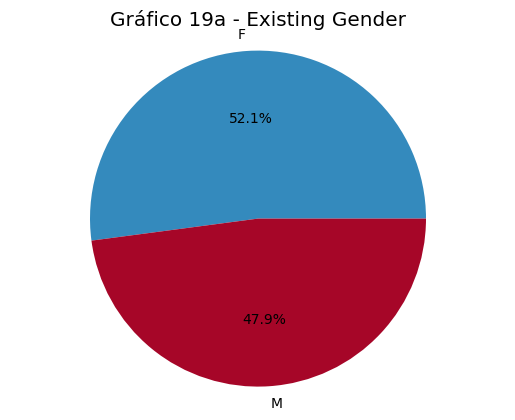

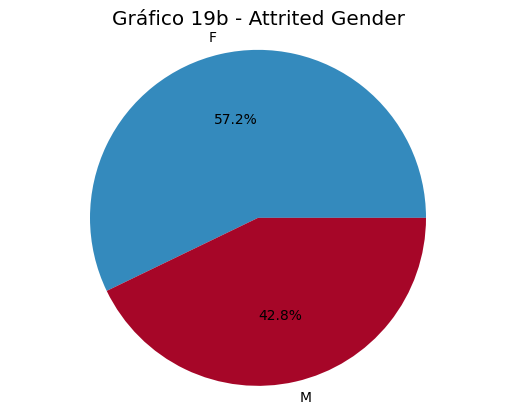

Gráfico 20 - Analisando a coluna: Education_Level


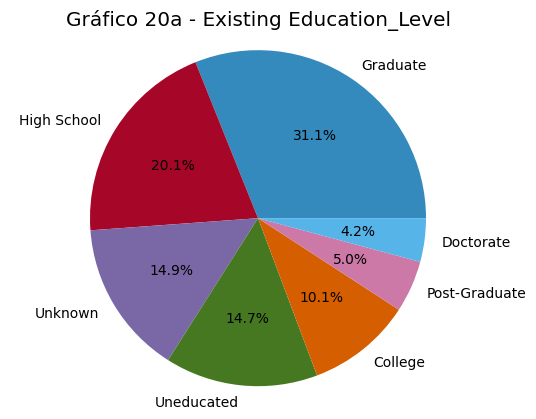

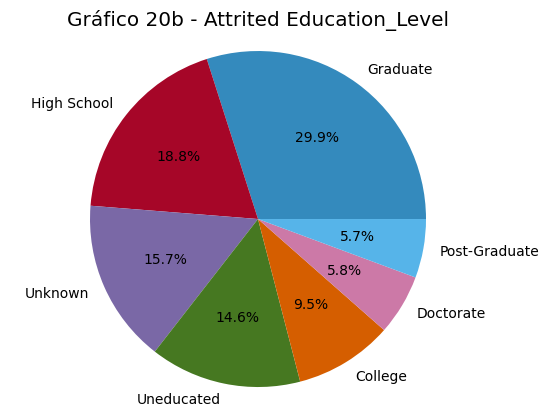

Gráfico 21 - Analisando a coluna: Marital_Status


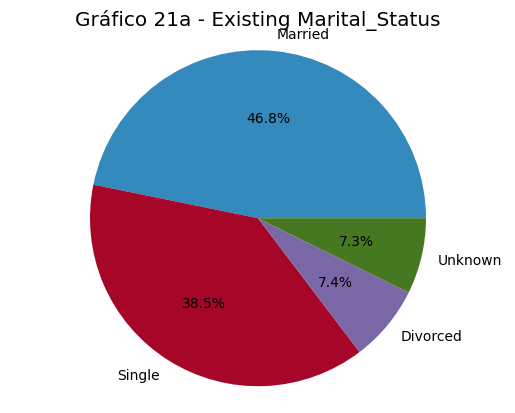

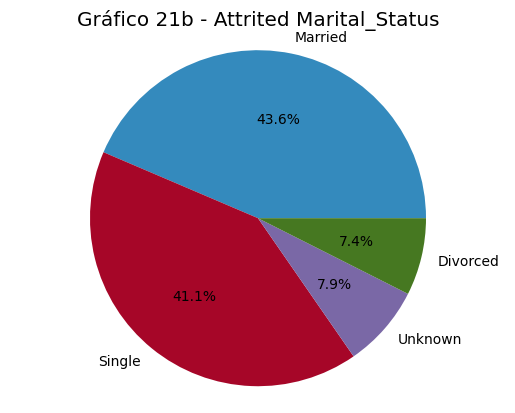

Gráfico 22 - Analisando a coluna: Income_Category


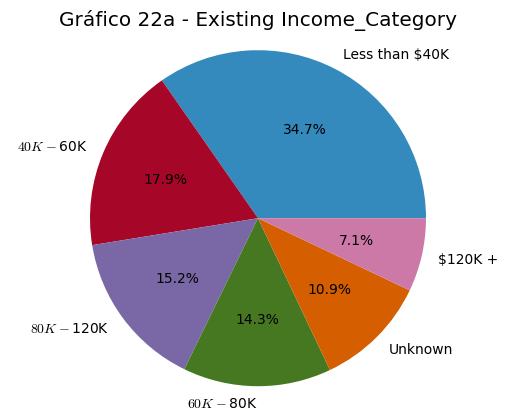

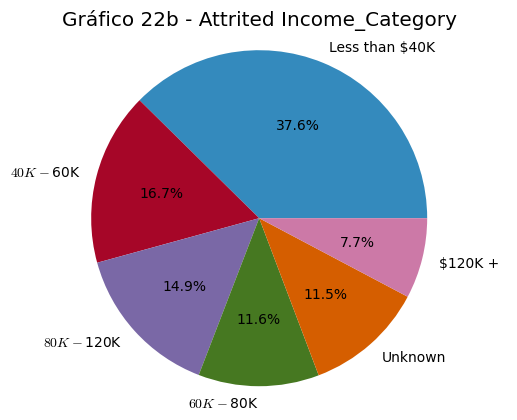

Gráfico 23 - Analisando a coluna: Card_Category


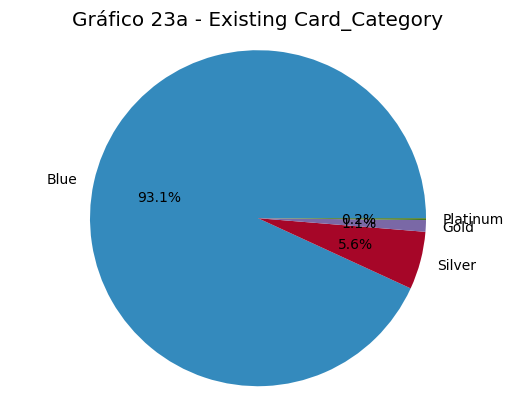

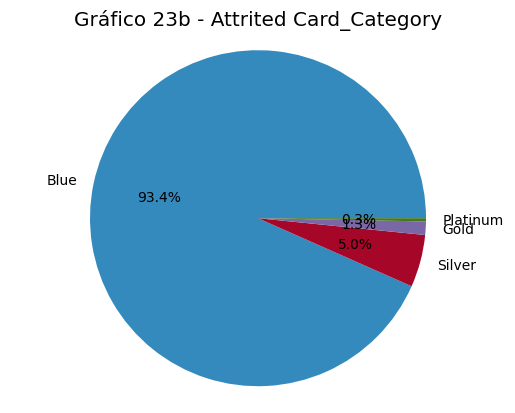

In [55]:
i = 19
for column in list_bad_columns:
    print(f"Gráfico {i} - Analisando a coluna: {column}")
    counts_existing = existing[column].value_counts()
    counts_attrited = attrited[column].value_counts()
#    print(counts_existing)
 #   print(counts_attrited)
    plt.pie(counts_existing.values, labels=counts_existing.index, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(f"Gráfico {i}a - Existing {column}")
    plt.show()
    plt.pie(counts_attrited.values, labels=counts_attrited.index, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(f"Gráfico {i}b - Attrited {column}")
    plt.show()
    i += 1

Avaliando as visualizações, nenhum dos atributos parece ter influência ou valor preditivo para avaliar se um cliente se tornará ex-cliente nos próximos meses ou não. Nesse sentido, passaremos reto para o restante da análise

# 4. Pré-Processamento e matriz de correlação

Uma das características desse conjunto de dados é possuir tanto colunas numéricas como colunas textuais. Na ótica da matriz de correlação, precisamos apenas de valores numéricos para sua visualização. Inicialmente, podemos excluir as colunas textuais para uma primeira visualização.

C:\Users\user\AppData\Local\Temp\ipykernel_3288\1728599129.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), annot=True)


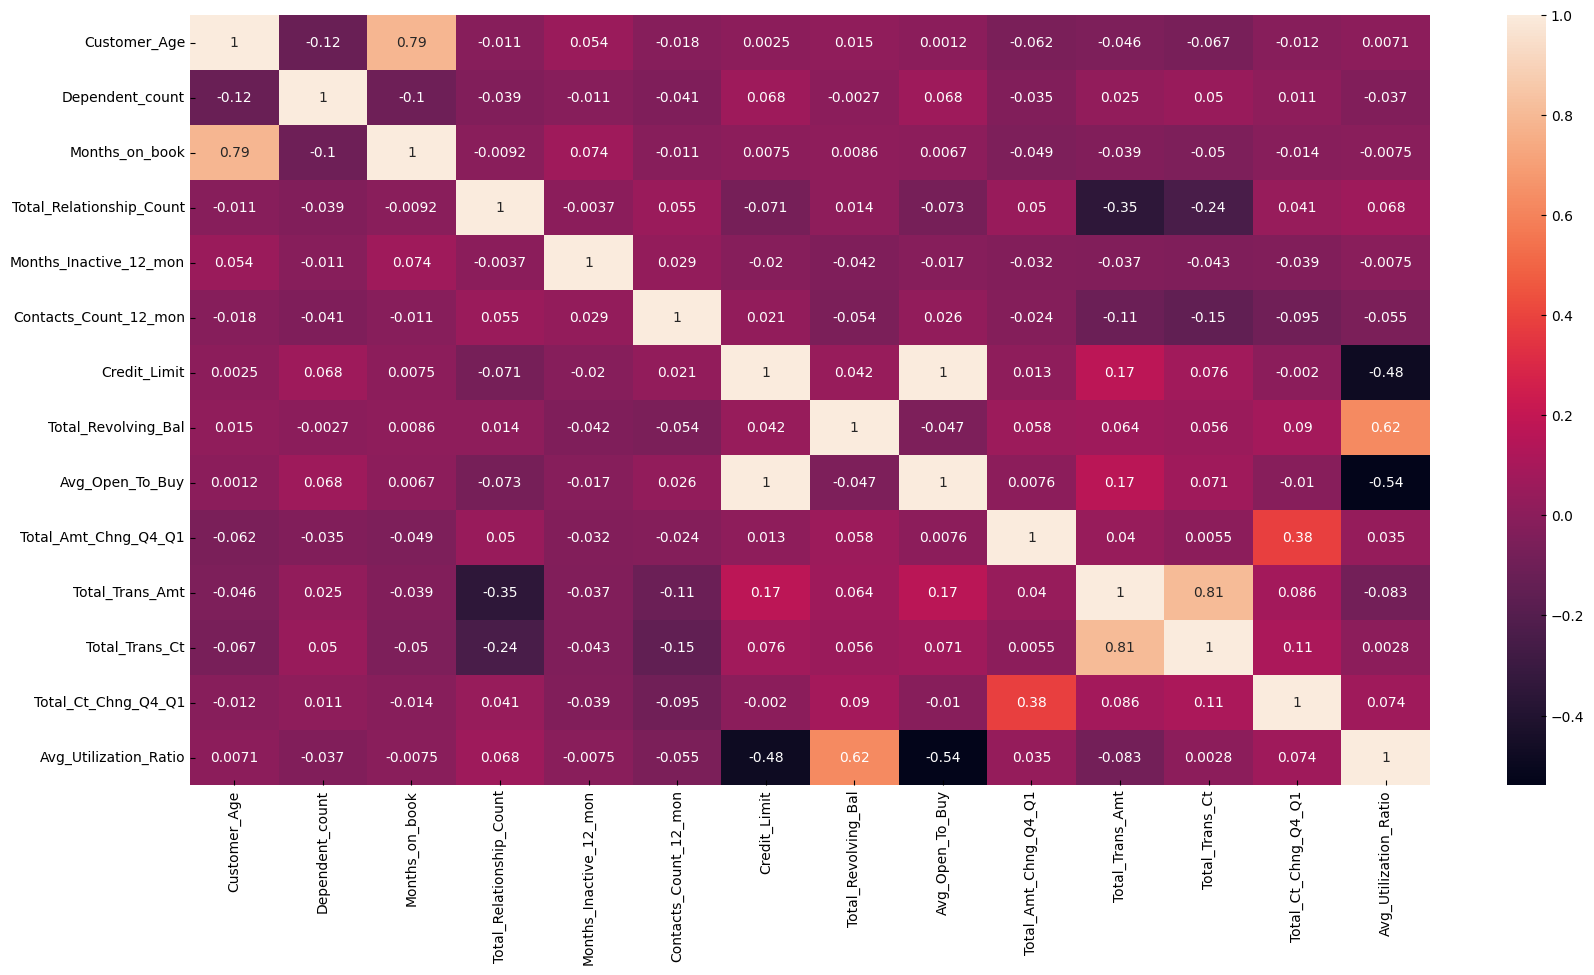

In [56]:
import seaborn as sn

fig = plt.figure(figsize=(20,10))
sn.heatmap(df.corr(), annot=True)
plt.show()

# O FutureWarning acontece pois o método de separação de variáveis numéricas
# das não-numéricas está deprecado. Devido a isso, ele sugere que façamos um 
# filtro previamente para que não haja problemas de compatibilidade com versões
# futuras que não conseguirão mais fazer essa separação automaticamente.
# No momento atual, podemos continuar fazendo desse jeito.

Apesar dessa matriz de correlação inicial apresentar as relações entre as variáveis numéricas, várias colunas foram deixadas de fora por serem valores textuais (`string`), inclusive a coluna de interesse `Attrition_Flag`. Para resolver esse problema, usaremos os chamados _encoders_: classes responsáveis por fazer mapeamentos de categorias em valores numéricos, mantendo suas relações. Inicialmente, adicionaremos a coluna _Attrition Flag_ utilizando o `LabelEncoder`.

In [57]:
df_enc = df.copy()
# Garantindo que não vamos alterar as informações no dataframe original.

In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df_enc['Attrition_Flag'])
df_enc['Attrition_Flag'] = label_encoder.transform(df_enc['Attrition_Flag'])
print(f"Classes: {label_encoder.classes_}")
df_enc.head()

# 1 = Existing customer
# 0 = Attrited customer

Classes: ['Attrited Customer' 'Existing Customer']


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Agora vamos reprocessar a matriz de correlação com a coluna de interesse transformada

C:\Users\user\AppData\Local\Temp\ipykernel_3288\1230131347.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df_enc.corr(), annot=True)


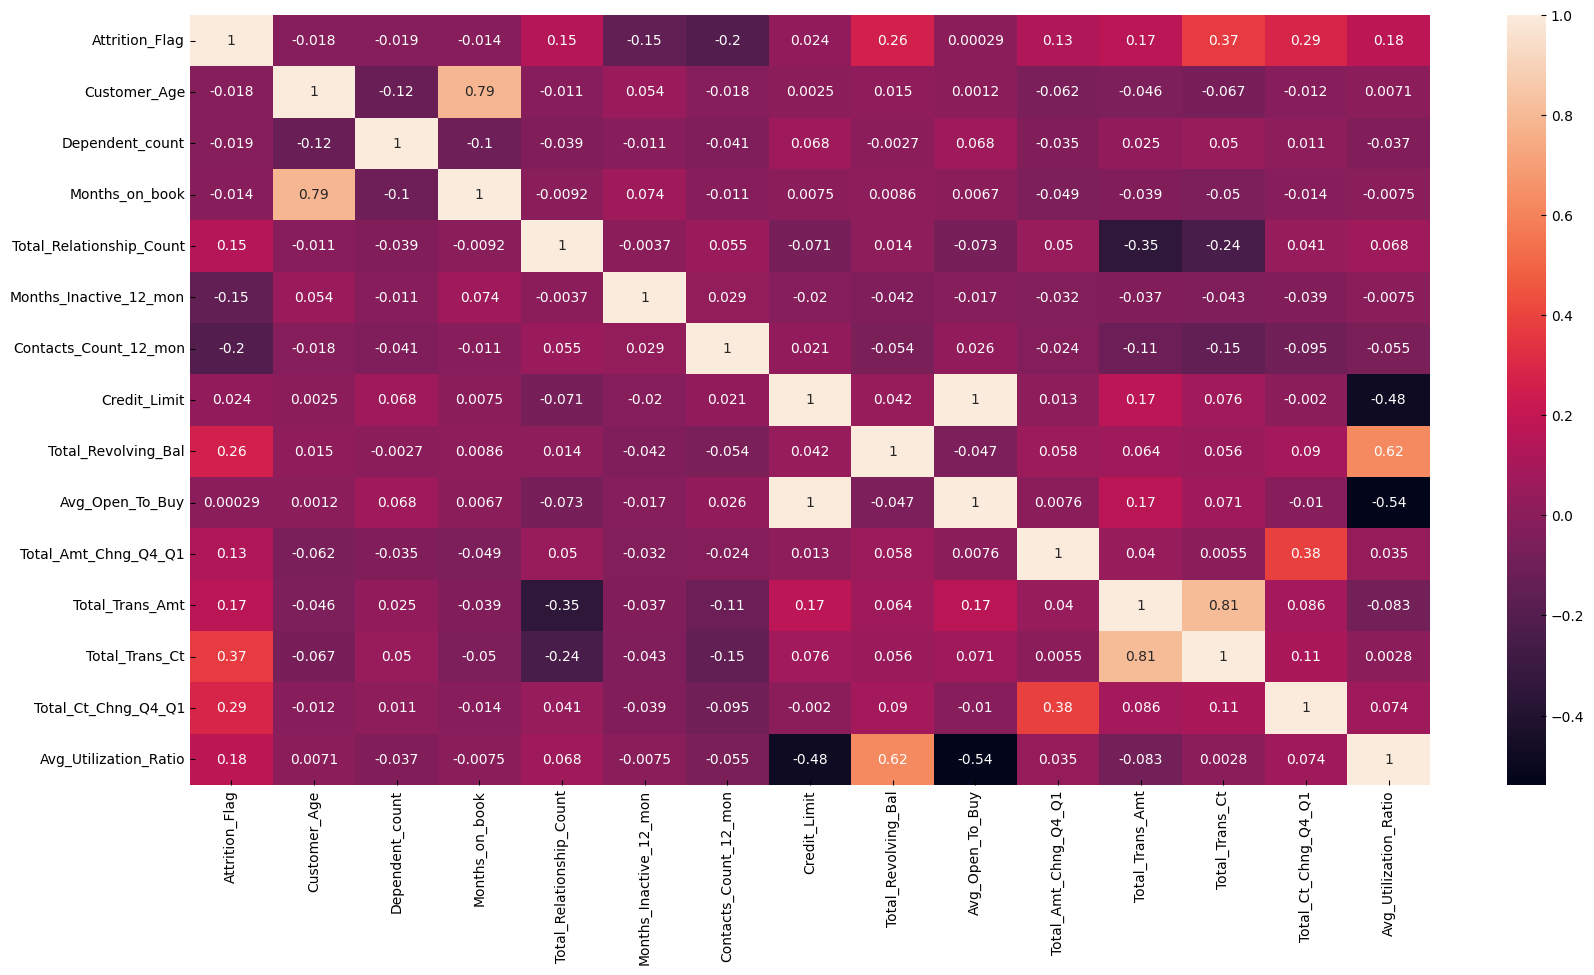

In [59]:
fig = plt.figure(figsize=(20,10))
sn.heatmap(df_enc.corr(), annot=True)
plt.show()

Na matriz de correlação, podemos identificar que algumas variáveis possuem correlação positiva (acima de 0) com o atributo `Attrition_Flag`. Arbitrariamente, selecionaremos os atributos com correlação acima de 0.2. São eles: saldo da conta de crédito rotativo `Total_Revolving_Bal`, quantidade de transações nos últimos 12 meses `Total_Trans_Ct` e a maior, modificação da quantidade de transações de um ano para o outro (do quarto para o primeiro trimestre)`Total_Ct_Chang_Q4_Q1`. Essas são as correlações mais fortes no universo de dados presentes.

É interessante que a análise de correlação retoma atributos que haviam anteriormente excluídos pela análise a olho nu, como `Total_Ct_Chang_Q4_Q1`.



Abaixo, faremos um _encoding_ das demais colunas não-numéricas.

As colunas a seguir possuem mais de uma categoria, e essas categorias não possuem ordem hierárquica entre si. Por causa disso, a técnica de _encoding_ utilizada anteriormente não funciona. Utilizaremos o `OneHotEncoding` para transformar essa variáveis.

Obs: Para facilitar a transformação, já que estamos trabalhando com um dataframe, utilizaremos o `LabelBinarizer`, uma implementação da técnica de `OneHotEncoding` mais amigável para dataframes.

In [60]:
string_cols = ["Education_Level",
             "Marital_Status",
             "Income_Category",
             "Card_Category"]

# Separando as colunas

from sklearn.preprocessing import LabelBinarizer

list_dfs = [] # Criando uma lista para armazenar os dfs encodados

for column in string_cols:
  # Iterando pelas colunas, faremos uma instância do LabelBinarizer
  # para cada uma, aplicando na coluna e retornando a variável df_out.
  enc = LabelBinarizer()
  enc.fit(df[column])
  transformed = enc.transform(df[column])
  df_out = pd.DataFrame(transformed)

  # a iteração a seguir será feita com objetivo de renomear o dataframe gerado
  # com os nomes das colunas originais para melhor entendimento
  # do usuário que for manipular o dataframe
  i = 0
  dict_names = {}
  classes = list(enc.classes_)
  for name in classes:
      dict_names[i] = f"{column}{name}"
      i += 1

  # Renomeando as colunas e montando a lista de dataframes
  df_out.rename(columns=dict_names, inplace=True)
  list_dfs.append(df_out)

# Concatenando os dataframes no original.
list_dfs.append(df_enc)
df_full_enc = pd.concat(list_dfs, axis=1)
df_full_enc.head()

,Education_LevelCollege,Education_LevelDoctorate,Education_LevelGraduate,Education_LevelHigh School,Education_LevelPost-Graduate,Education_LevelUneducated,Education_LevelUnknown,Marital_StatusDivorced,Marital_StatusMarried,Marital_StatusSingle,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,0,0,1,0,0,0,0,1,0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,0,1,0,0,0,0,0,0,1,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,0,1,0,0,0,0,0,1,0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,0,0,1,0,0,0,0,0,0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,0,0,0,0,1,0,0,1,0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Podemos ver que agora todas as variáveis são numéricas, e novas colunas foram adicionadas com os dados _encodados_.

In [61]:
df_full_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Education_LevelCollege         10127 non-null  int32  
 1   Education_LevelDoctorate       10127 non-null  int32  
 2   Education_LevelGraduate        10127 non-null  int32  
 3   Education_LevelHigh School     10127 non-null  int32  
 4   Education_LevelPost-Graduate   10127 non-null  int32  
 5   Education_LevelUneducated      10127 non-null  int32  
 6   Education_LevelUnknown         10127 non-null  int32  
 7   Marital_StatusDivorced         10127 non-null  int32  
 8   Marital_StatusMarried          10127 non-null  int32  
 9   Marital_StatusSingle           10127 non-null  int32  
 10  Marital_StatusUnknown          10127 non-null  int32  
 11  Income_Category$120K +         10127 non-null  int32  
 12  Income_Category$40K - $60K     10127 non-null 

A transformação das variáveis em números possibilita a visualização de estatísticas descritivas onde antes eram apenas `strings`.

In [62]:
df_full_enc.describe().T

,count,mean,std,min,25%,50%,75%,max
Education_LevelCollege,10127.0,0.100030,0.300054,0.0,0.000,0.000,0.000,1.000
Education_LevelDoctorate,10127.0,0.044534,0.206289,0.0,0.000,0.000,0.000,1.000
Education_LevelGraduate,10127.0,0.308877,0.462053,0.0,0.000,0.000,1.000,1.000
Education_LevelHigh School,10127.0,0.198776,0.399098,0.0,0.000,0.000,0.000,1.000
Education_LevelPost-Graduate,10127.0,0.050953,0.219912,0.0,0.000,0.000,0.000,1.000
Education_LevelUneducated,10127.0,0.146835,0.353959,0.0,0.000,0.000,0.000,1.000
Education_LevelUnknown,10127.0,0.149995,0.357084,0.0,0.000,0.000,0.000,1.000
Marital_StatusDivorced,10127.0,0.073862,0.261559,0.0,0.000,0.000,0.000,1.000
Marital_StatusMarried,10127.0,0.462822,0.498641,0.0,0.000,0.000,1.000,1.000
Marital_StatusSingle,10127.0,0.389355,0.487628,0.0,0.000,0.000,1.000,1.000


Por fim, _plotaremos_ a matriz de correlação final com todos os dados encodados. Essa matriz não apresenta uma leitura visual capaz de tirar conclusões a olhos nus, mas está exposta para fins demonstrativos, já que a anterior já correlaciona a maioria das variáveis importantes para nosso objetivo. 

C:\Users\user\AppData\Local\Temp\ipykernel_3288\284456909.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df_full_enc.corr(), annot=True)


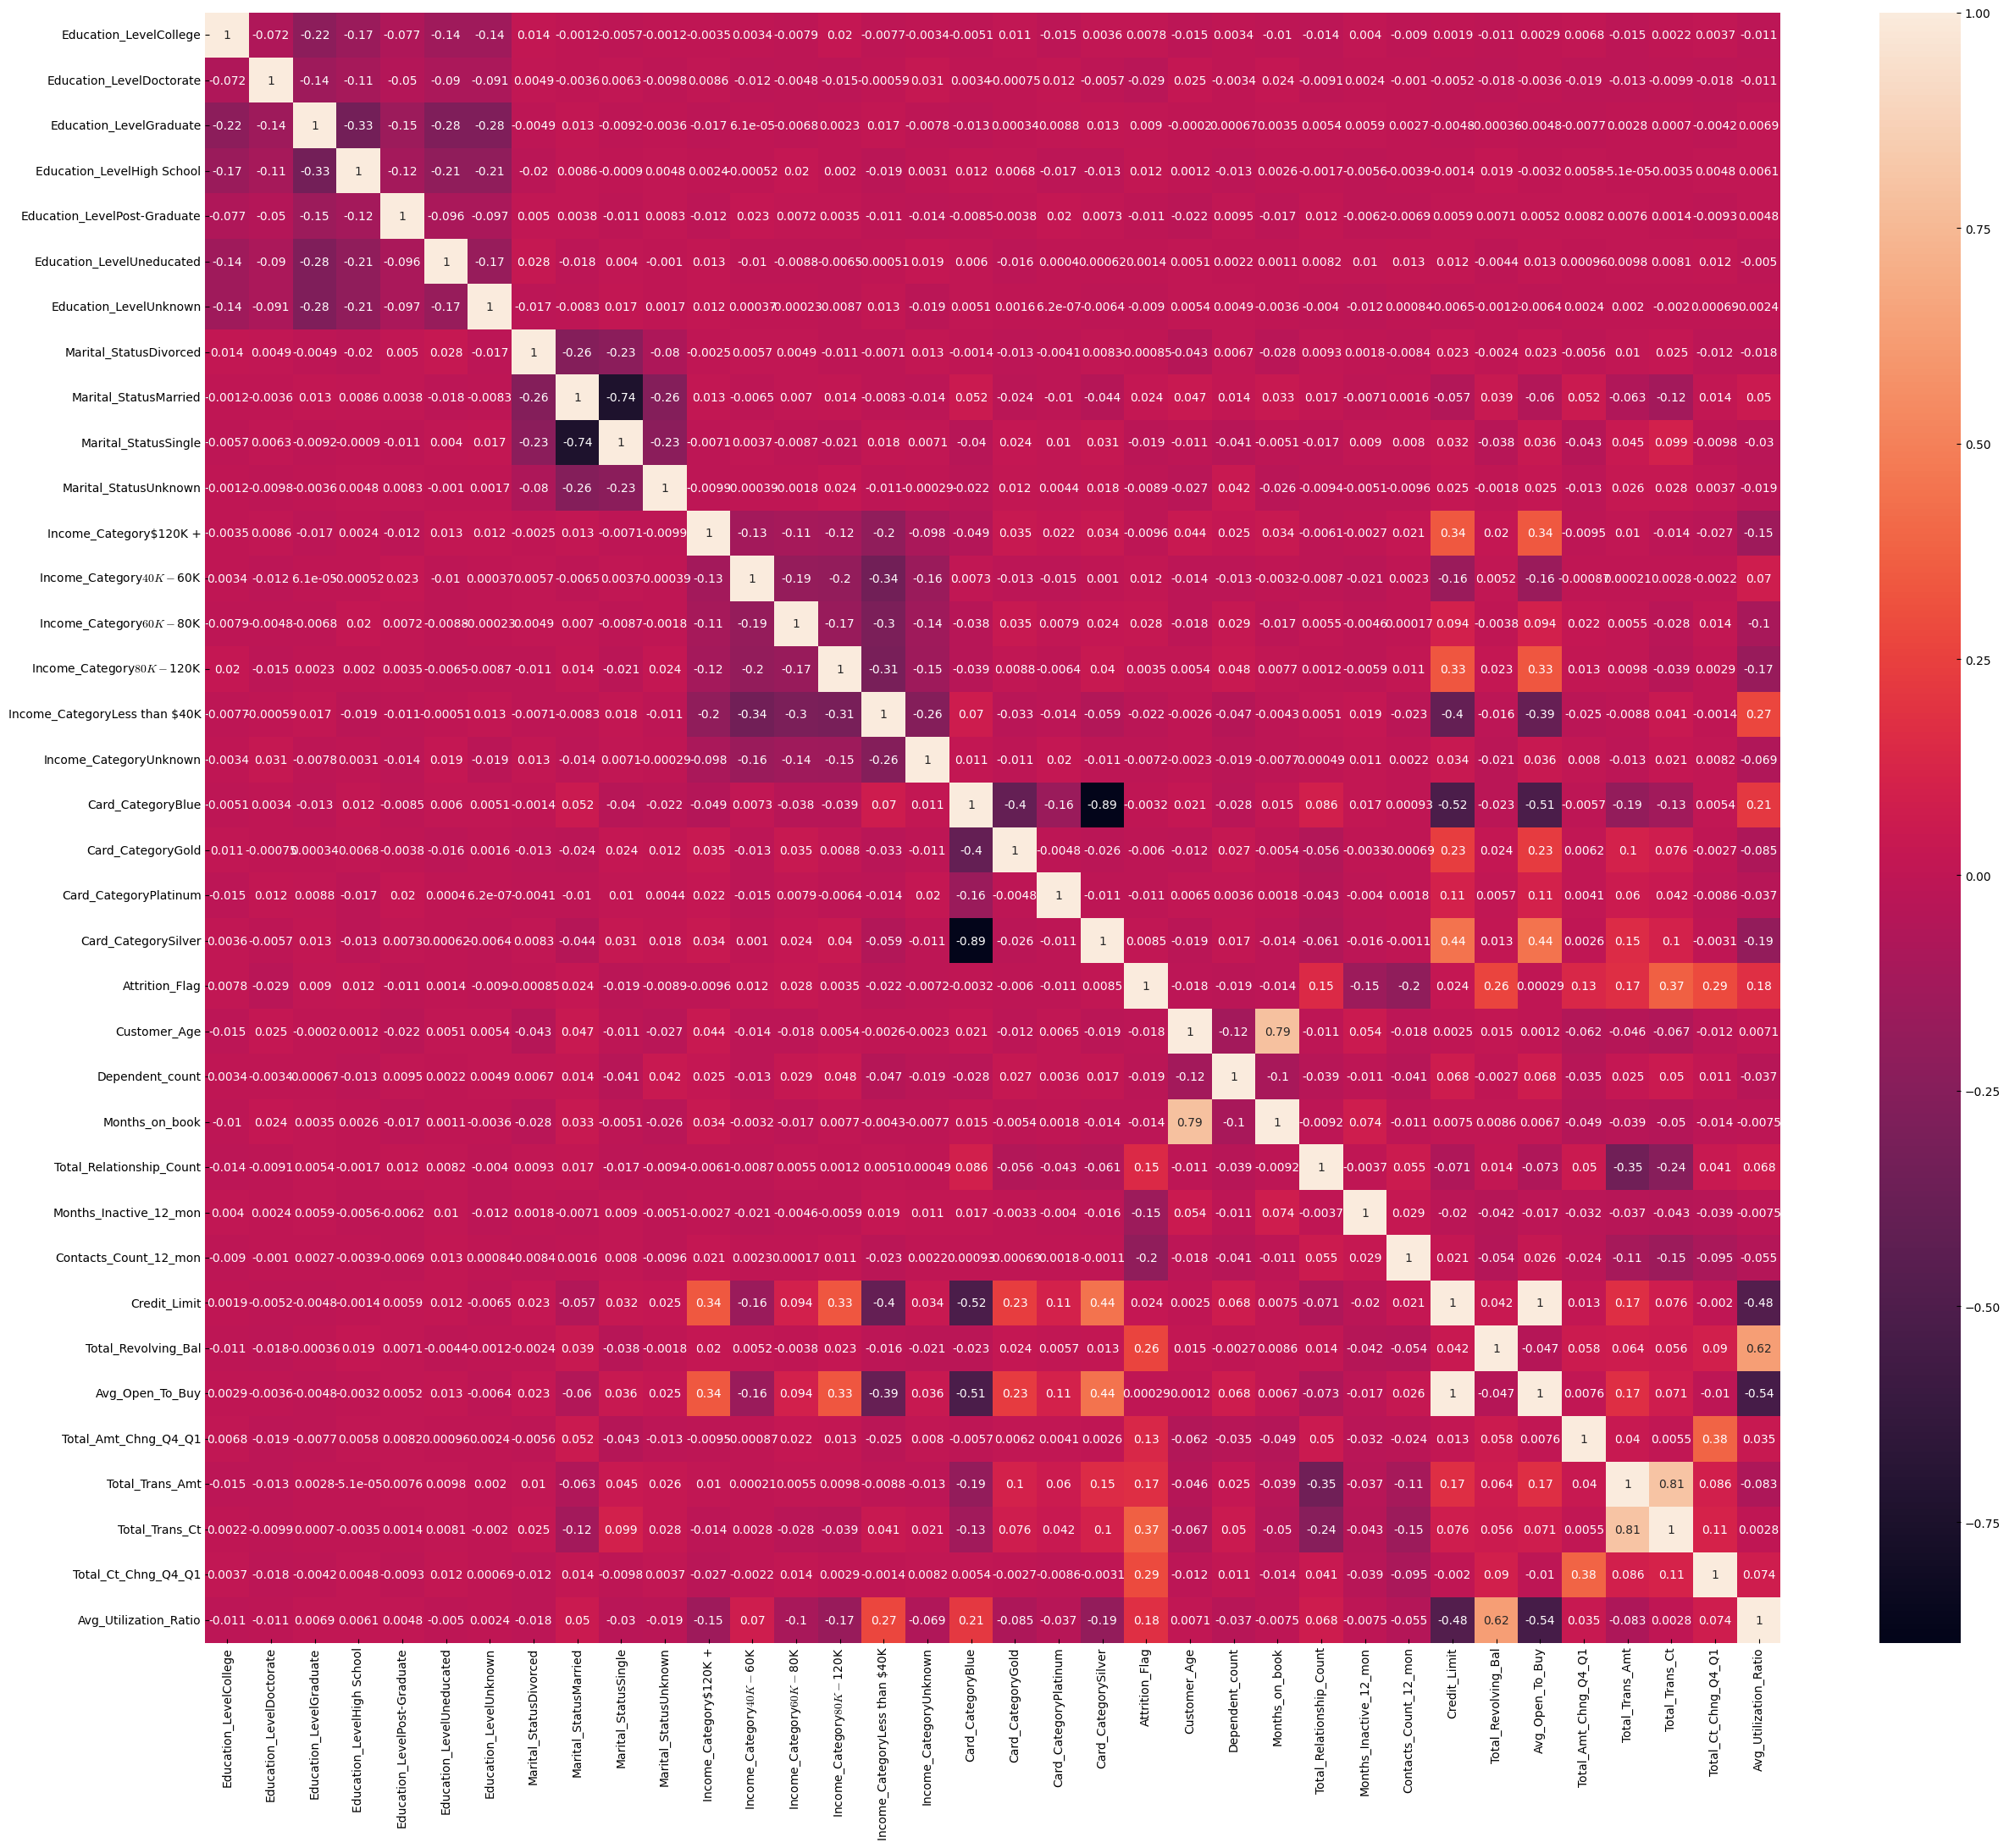

In [63]:
fig = plt.figure(figsize=(30,25))
sn.heatmap(df_full_enc.corr(), annot=True)
plt.show()

Daqui em diante, o dataframe está pronto para modelagem. Se trata de um problema de aprendizado de máquina supervisionado de classificação.

# 5. Conclusão

Após a análise dos dados e das visualizações produzidas, percebemos que é possível identificar elementos que possam identificar uma mudança de comportamento de um cliente em vias de se tornar ex-cliente. Técnicas de aprendizado de máquina podem aprofundar ainda mais essa análise, retornando novas métricas e indicadores preditivos mais acurados.

Entretanto, enquanto tais modelos não são desenvolvidos para o caso em análise, podemos indicar as seguintes medidas para a gerência do banco:

- **Focar nos grupos de menor renda** do universo observável: embora o poder de compra seja individualmente menor, a maioria da clientela do banco possui rendimentos inferiores a 60 mil dólares, o que equivale a 52,6%. Por isso, estratégias focalizadas nesse grupo podem fortalecer a base de clientes.

- **Buscar estratégias de comunicação para grupos de maior renda**: Quanto mais diversificada for a base de renda dos clientes, mais blindado o banco será aos padrões de comportamento de um determinado setor social.

- **Agir proativamente quando a atividade estiver baixa**: Existe uma maior incidência de níveis de atividades reduzidos no grupo de ex-clientes analisados, de maneira que é inteligente focalizar ações proativas para retenção em grupos de clientes em que a redução da atividade nos últimos 12 meses  seja visível.

- **Fortalecer a integração de produtos**: Vimos que quanto menos produtos os clientes utilizam, mais eles tendem a abandonar os serviços do banco. Desas maneira, quanto mais integrados forem os produtos, mais os clientes se envolverão no ecossistema de serviços do banco e tenderão a permanecer.

- **Crie formas de incentivar o uso do cartão de crédito pelos clientes**: Uma forma de recompensa ou de pontuação, por exemplo, pode ser a diferença significativa entre um cliente que abandona o banco e um cliente que permanece cliente.

- **Desenvolvimento de melhor estratégia de comunicação**: Vimos que há uma maior incidência de contatos entre o banco e o cliente no universo analisável dos ex-clientes. Podemos inferir que a estratégia de comunicação do banco não está sendo eficiente para retê-los. É interessante que se investigue os problemas e a comunicação seja melhorada.